In [1]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load full_weather
full_weather = pd.read_csv('data/weather/merged_data/full_weather.csv', index_col= 'date' , parse_dates= ['date'])
full_weather.head()

,rain,temp,rhum,msl,wdsp,wddir,rain.1,temp.1,rhum.1,msl.1,...,rhum.10,msl.10,wdsp.10,wddir.10,rain.11,temp.11,rhum.11,msl.11,wdsp.11,wddir.11
date,,,,,,,,,,,,,,,,,,,,,
1944-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,93.0,1027.9,19,290.0,NaN,NaN,NaN,NaN,NaN,NaN
1944-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91.0,1027.6,19,280.0,NaN,NaN,NaN,NaN,NaN,NaN
1944-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,92.0,1027.0,19,260.0,NaN,NaN,NaN,NaN,NaN,NaN
1944-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90.0,1026.2,19,270.0,NaN,NaN,NaN,NaN,NaN,NaN
1944-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,89.0,1025.5,19,270.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Remove the suffixes from the column names
full_weather.columns =full_weather.columns.str.replace(r'\.\d+', '', regex= True)

In [4]:
# Transform the data set
full_weather = full_weather.T.groupby(full_weather.columns).mean().T.round(2)
full_weather.head()

,msl,rain,rhum,temp,wddir,wdsp
date,,,,,,
1944-01-01 00:00:00,1031.10,0.00,89.5,8.25,295.0,15.5
1944-01-01 01:00:00,1030.75,0.00,90.5,8.05,285.0,14.0
1944-01-01 02:00:00,1030.20,0.00,87.5,8.30,270.0,15.0
1944-01-01 03:00:00,1029.50,0.00,88.0,8.25,275.0,15.0
1944-01-01 04:00:00,1028.95,0.25,89.0,7.90,285.0,15.0


In [5]:
full_weather.rename({'msl': 'Pressure (hPa)', 
                        'rain': 'Rain (mm)', 
                        'temp': 'Temp (°C)', 
                        'wddir': 'Wind Direction (deg)', 
                        'wdsp': 'Wind Speed (knots)', 
                        'rhum': 'Relative Humidity (%)'}, 
                        axis = 'columns',
                        inplace= True)

In [6]:
full_weather.describe()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots)
count,709321.000000,709321.000000,709321.000000,709321.000000,709321.000000,709321.000000
mean,1013.608292,0.125981,83.412828,10.046554,200.401654,10.099522
std,12.347379,0.287370,9.248215,4.425590,69.749126,4.946034
min,944.030000,0.000000,36.170000,-8.890000,0.000000,0.000000
25%,1006.170000,0.000000,78.080000,6.940000,151.670000,6.330000
50%,1014.900000,0.000000,85.330000,10.120000,207.500000,9.330000
75%,1022.300000,0.120000,90.500000,13.300000,253.330000,13.000000
max,1049.220000,8.330000,181.830000,27.440000,360.000000,44.330000


In [7]:
full_weather.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 709321 entries, 1944-01-01 00:00:00 to 2024-12-01 00:00:00
Data columns (total 6 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Pressure (hPa)         709321 non-null  float64
 1   Rain (mm)              709321 non-null  float64
 2   Relative Humidity (%)  709321 non-null  float64
 3   Temp (°C)              709321 non-null  float64
 4   Wind Direction (deg)   709321 non-null  float64
 5   Wind Speed (knots)     709321 non-null  float64
dtypes: float64(6)
memory usage: 54.0 MB


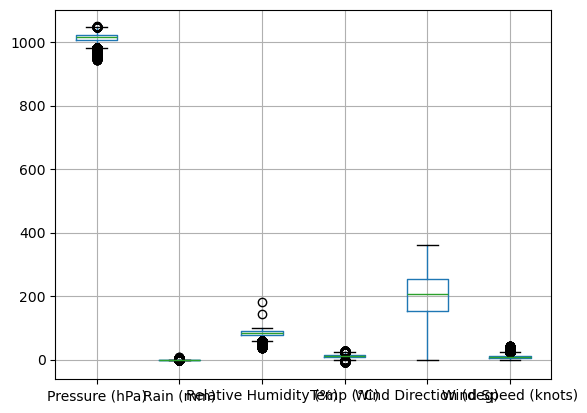

In [8]:
full_weather.boxplot()
plt.show()

# Trends in Weather Since 1944

In [9]:
# 
yearly_weather = full_weather.resample('YE').mean()
yearly_weather.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots)
date,,,,,,
1944-12-31,1016.275882,0.112967,81.977174,10.145628,202.976434,10.954292
1945-12-31,1015.041228,0.113063,84.067919,10.732281,191.862624,10.698941
1946-12-31,1013.754418,0.131450,82.557236,9.881180,194.344760,11.251252
1947-12-31,1012.983849,0.131039,83.498215,9.755525,179.146513,10.920345
1948-12-31,1013.702330,0.127533,83.192139,10.423476,197.734906,11.176925


In [10]:
monthly_weather = full_weather.resample('ME').mean()
monthly_weather.head()

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots)
date,,,,,,
1944-01-31,1018.390188,0.154234,85.583333,8.259677,221.008065,15.800403
1944-02-29,1023.495905,0.055172,79.168822,5.612500,186.048851,12.955460
1944-03-31,1022.959073,0.014919,77.895833,6.700403,191.256720,8.386425
1944-04-30,1015.498819,0.105764,82.538194,10.059931,187.381944,10.373611
1944-05-31,1021.396573,0.037030,74.952957,10.972513,178.178763,9.875000


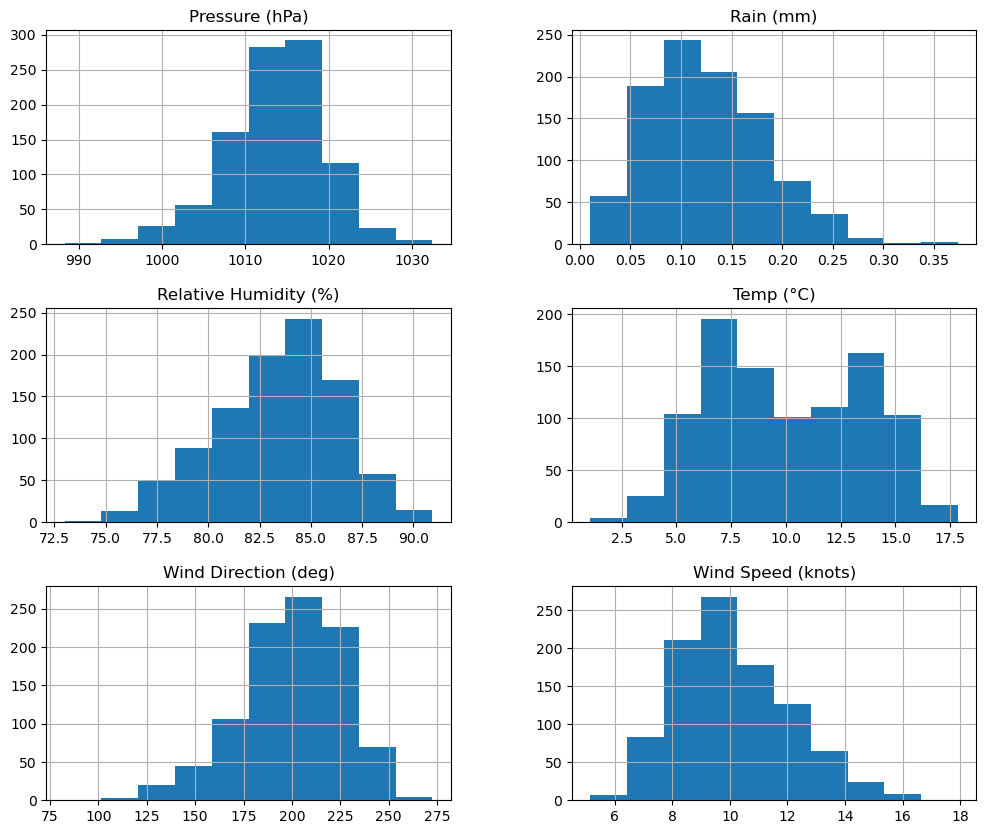

In [11]:
monthly_weather.hist(figsize= (12,10))
plt.show()

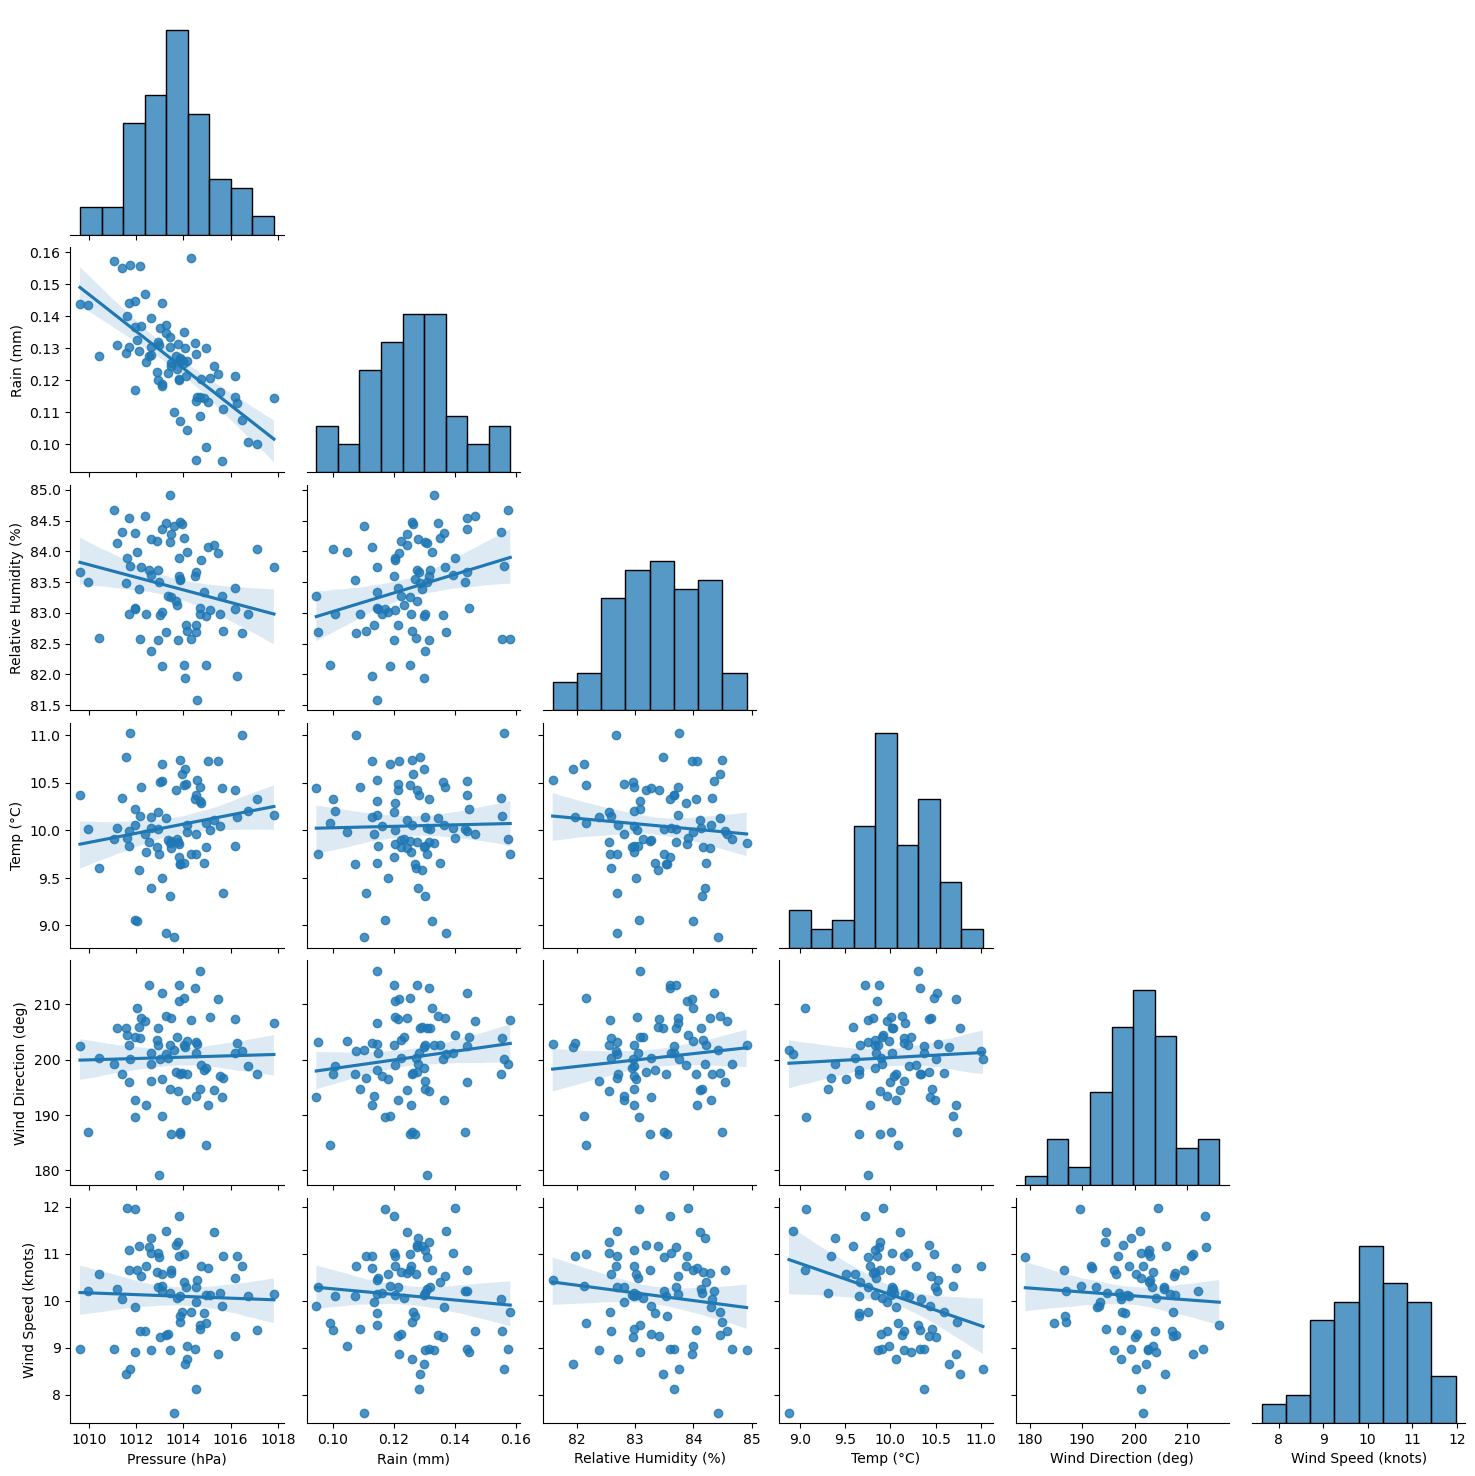

In [12]:
sns.pairplot(data= yearly_weather, kind= 'reg', corner = True)
plt.show()

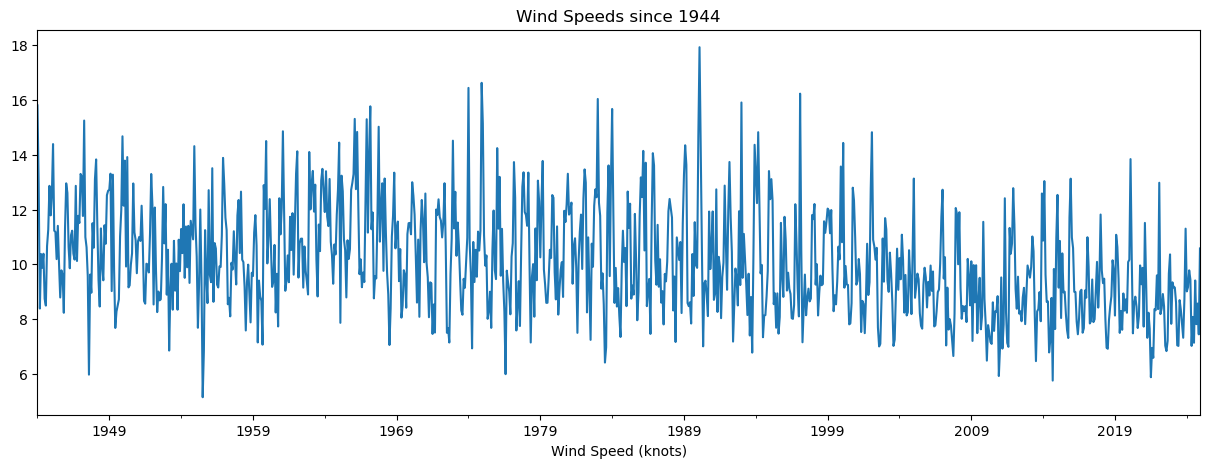

In [13]:
fig, ax = plt.subplots(figsize = (15,5))

monthly_weather['Wind Speed (knots)'].plot(subplots= True)

plt.title('Wind Speeds since 1944')
plt.xlabel('Wind Speed (knots)')

plt.show()

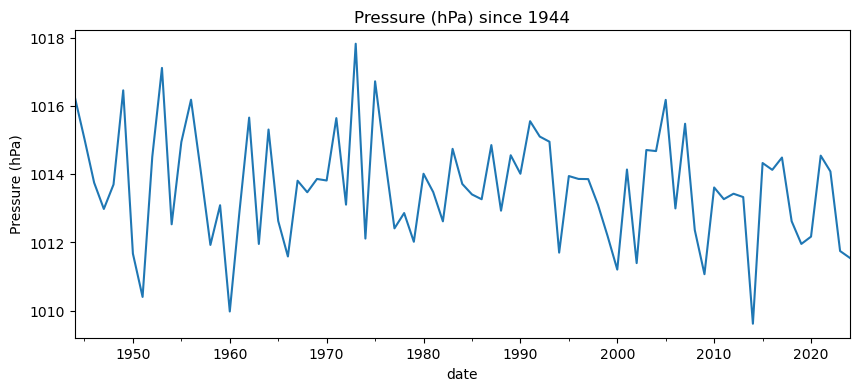

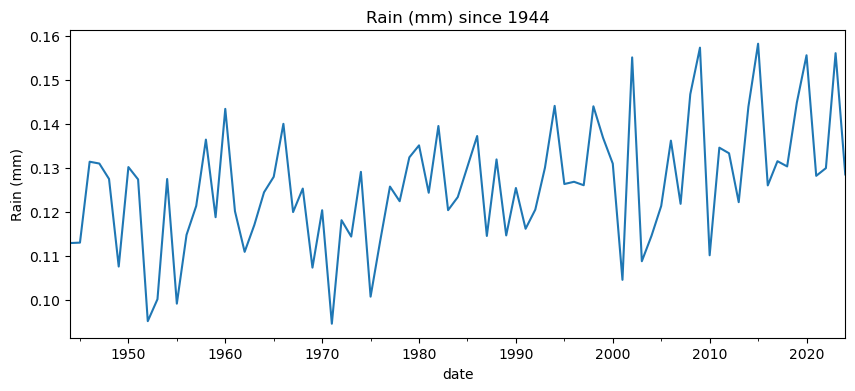

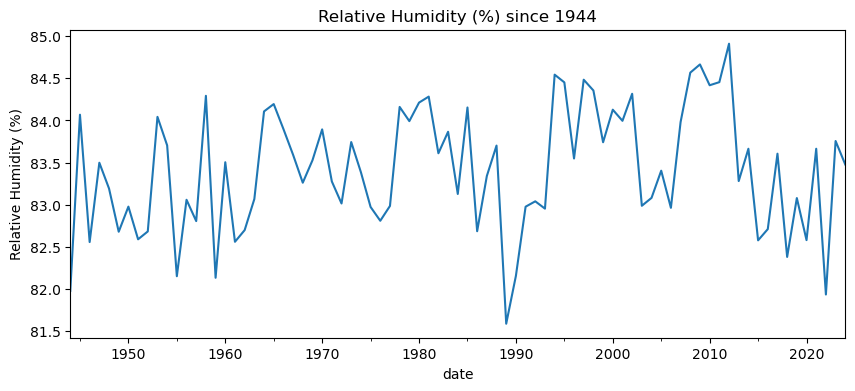

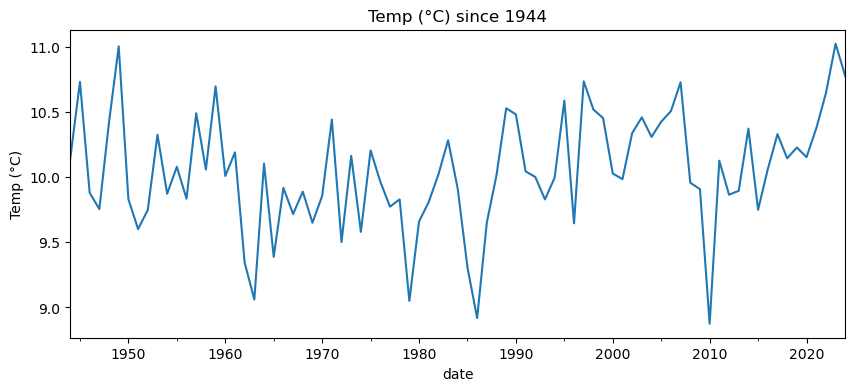

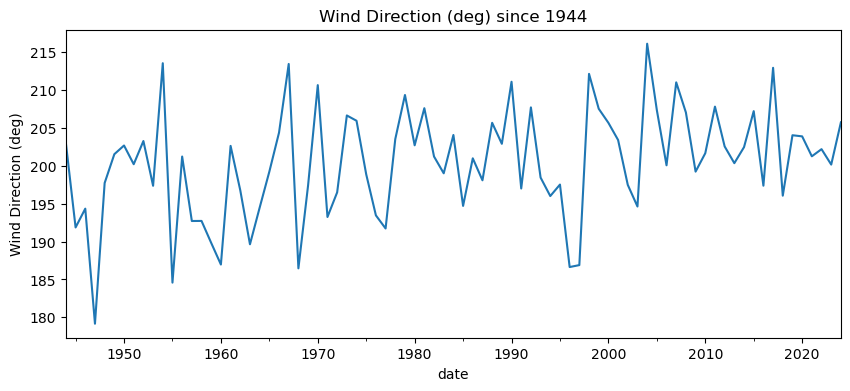

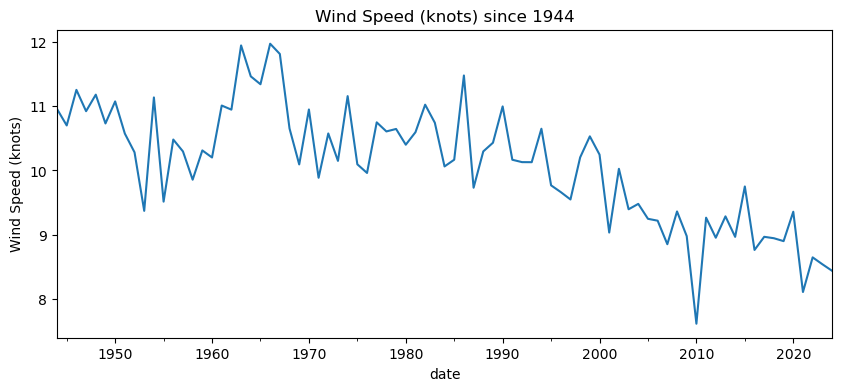

In [29]:
for col in yearly_weather:
    fig, ax = plt.subplots(figsize = (10,4))
    yearly_weather[col].plot(subplots= True)

    plt.title(f'{col} since 1944')
    plt.ylabel(col)

    plt.show()

In [15]:
full_weather.corr().round(3)

,Pressure (hPa),Rain (mm),Relative Humidity (%),Temp (°C),Wind Direction (deg),Wind Speed (knots)
Pressure (hPa),1.000,-0.356,-0.133,0.085,-0.050,-0.396
Rain (mm),-0.356,1.000,0.236,0.011,-0.047,0.264
Relative Humidity (%),-0.133,0.236,1.000,-0.192,-0.090,-0.209
Temp (°C),0.085,0.011,-0.192,1.000,0.069,0.032
Wind Direction (deg),-0.050,-0.047,-0.090,0.069,1.000,0.193
Wind Speed (knots),-0.396,0.264,-0.209,0.032,0.193,1.000


In [32]:
index_month = full_weather.index.month

In [36]:
windspeed_by_month = full_weather.groupby(index_month)['Wind Speed (knots)'].agg(['max', 'mean'])
print(windspeed_by_month)

        max       mean
date                  
1     43.50  11.585850
2     41.50  11.486865
3     35.33  10.950469
4     40.33   9.976381
5     31.50   9.545782
6     31.75   9.002023
7     28.67   8.671658
8     32.25   8.633665
9     37.75   9.422633
10    36.00  10.146560
11    38.25  10.487366
12    44.33  11.374697


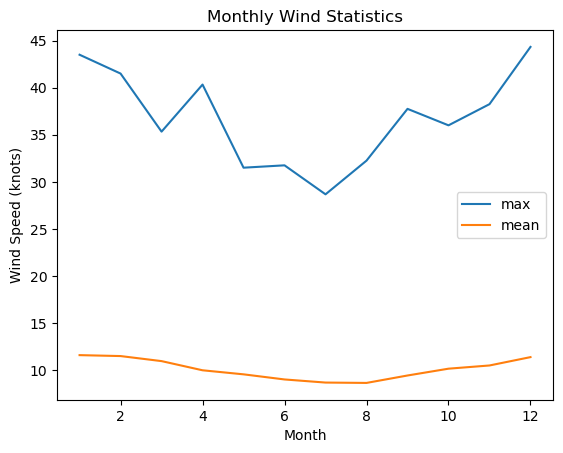

In [38]:
fig, ax = plt.subplots()
windspeed_by_month.plot(ax = ax)

plt.xlabel('Month')
plt.ylabel('Wind Speed (knots)')
plt.title('Monthly Wind Statistics')

plt.show()

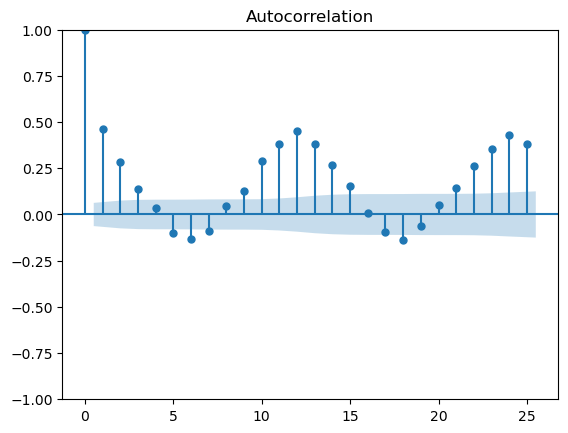

In [20]:
from statsmodels.graphics import tsaplots

tsaplots.plot_acf(monthly_weather['Wind Speed (knots)'], lags= 25)

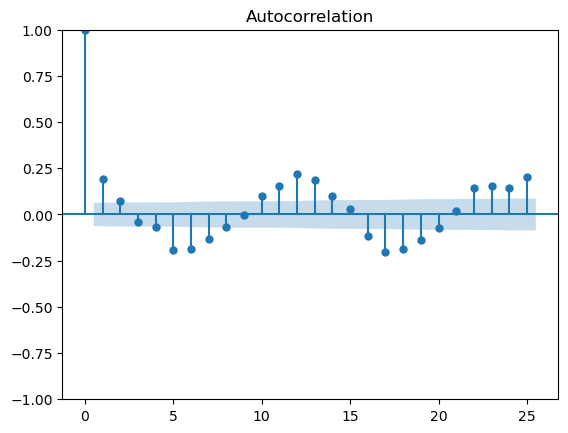

In [23]:
tsaplots.plot_acf(monthly_weather['Rain (mm)'], lags= 25)

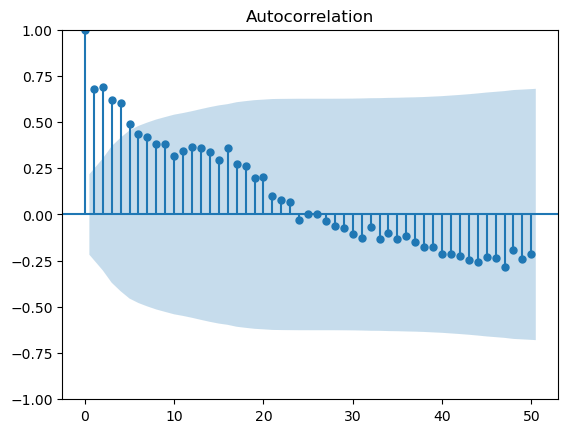

In [22]:
tsaplots.plot_acf(yearly_weather['Wind Speed (knots)'], lags= 50)

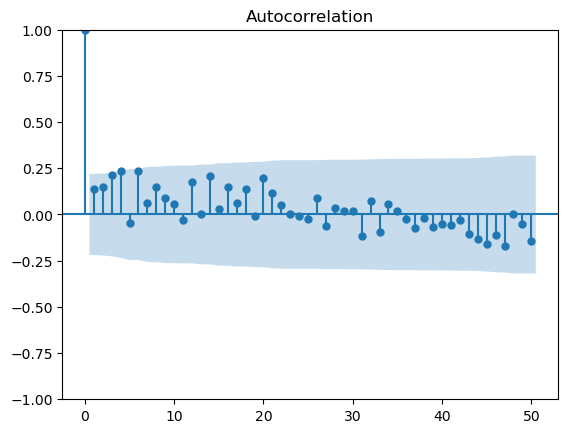

In [24]:
tsaplots.plot_acf(yearly_weather['Rain (mm)'], lags= 50)

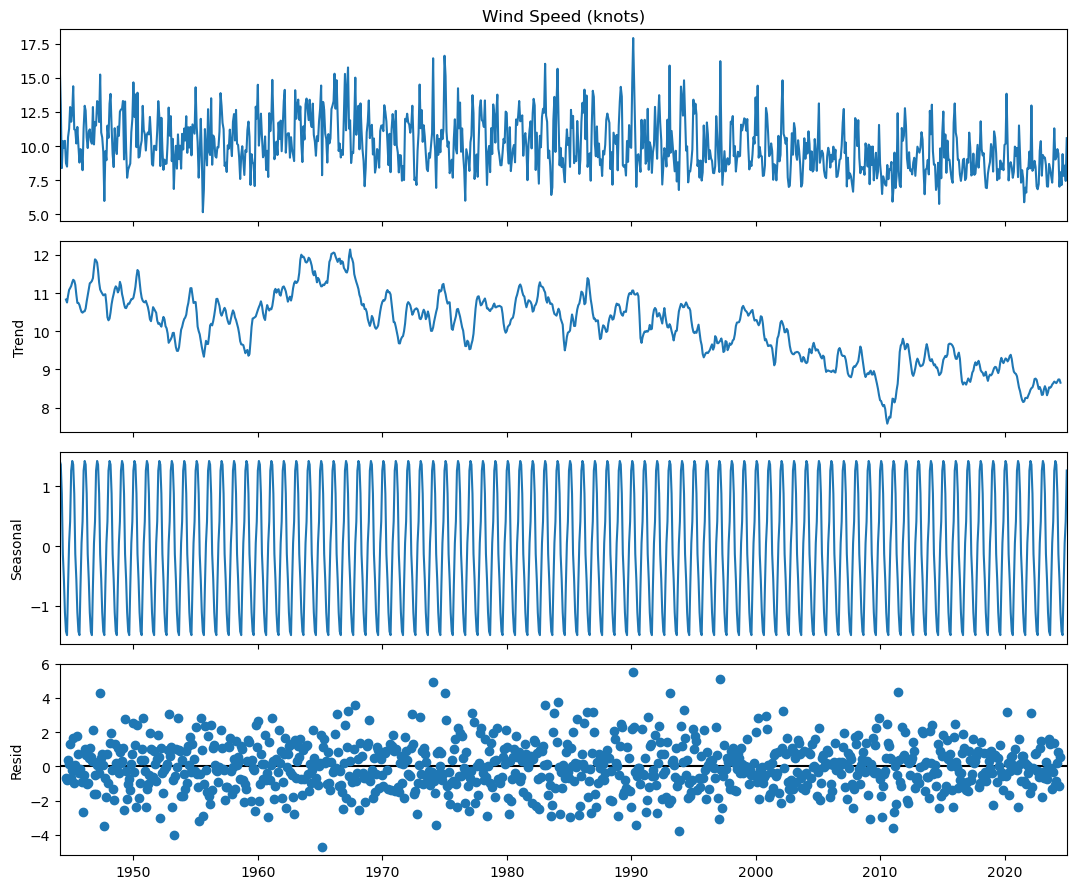

In [39]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 11, 9

decomposition = sm.tsa.seasonal_decompose(monthly_weather['Wind Speed (knots)'], model= 'additive', period = 12)
fig = decomposition.plot()

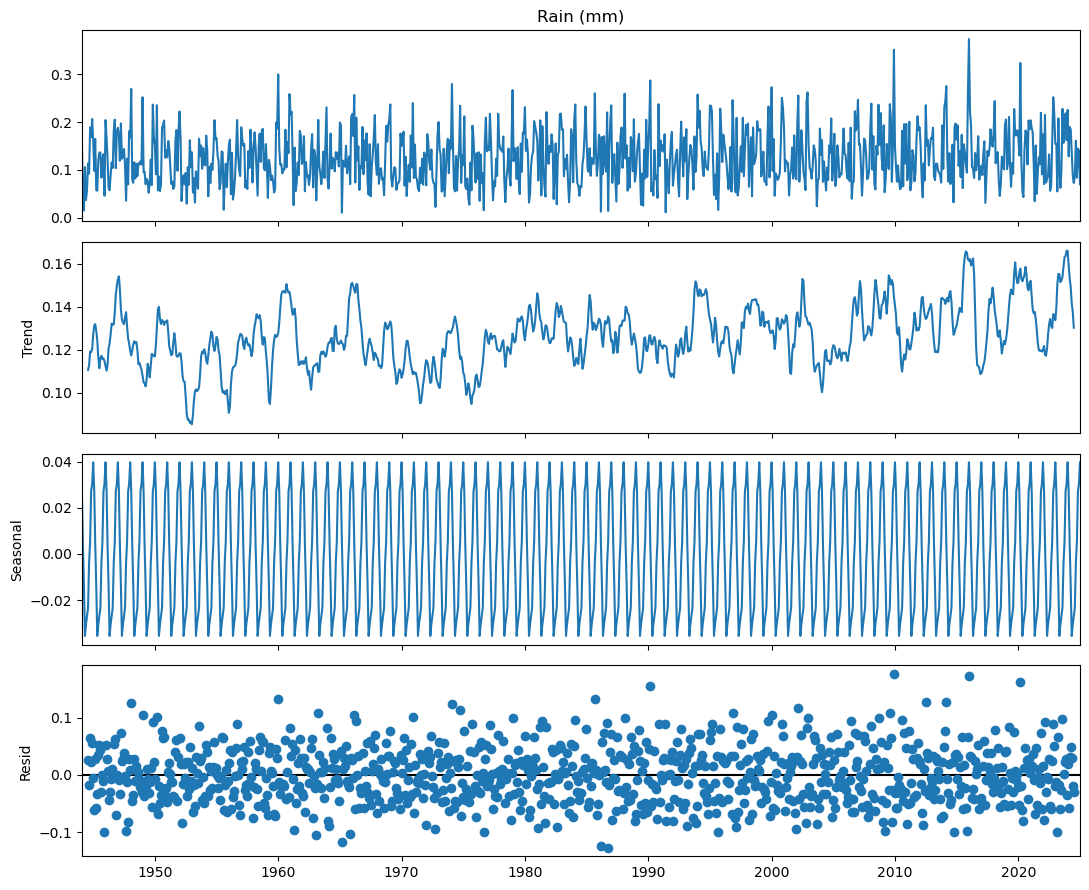

In [40]:
decomposition = sm.tsa.seasonal_decompose(monthly_weather['Rain (mm)'], model= 'additive', period = 12)
fig = decomposition.plot()